In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from numba import njit, prange

In [2]:
np.random.seed(42)  # Đảm bảo kết quả nhất quán

def createNodes(N, scale=100):
    """Generate list of nodes to visit"""
    # Tạo một danh sách các thành phố (nút) với tọa độ ngẫu nhiên
    return np.random.rand(N, 2) * scale

In [4]:
def quot_tsp(nodes : np.ndarray):
    current_node = nodes[0]
    visited = np.array([nodes[0]])
    unvisited = nodes[1:]

    while len(unvisited) != 0:
        centroid = np.average(np.vstack((unvisited, nodes[0])), axis=0)
        unvisited_count = len(unvisited)
        qcosts = np.empty(unvisited_count)
        
        for i in range(unvisited_count):
            dist_cost = np.linalg.norm(unvisited[i] - current_node)
            centroid_cost = np.linalg.norm(unvisited[i] - centroid)
            qcosts[i] = dist_cost / (centroid_cost)

        min_idx = np.argmin(qcosts, keepdims=True)
        visited = np.vstack((visited, unvisited[min_idx]))
        current_node = unvisited[min_idx]
        unvisited = np.delete(unvisited, min_idx, axis=0)
    
    return visited

In [5]:
def nn_tsp(nodes : np.ndarray):
    current_node = nodes[0]
    visited = np.array([nodes[0]])
    unvisited = nodes[1:]

    while len(unvisited) != 0:
        centroid = np.average(visited, axis=0)
        unvisited_count = len(unvisited)
        costs = np.empty(unvisited_count)
        
        for i in range(unvisited_count):
            costs[i] = np.linalg.norm(unvisited[i] - current_node)

        min_idx = np.argmin(costs, keepdims=True)
        visited = np.vstack((visited, unvisited[min_idx]))
        current_node = unvisited[min_idx]
        unvisited = np.delete(unvisited, min_idx, axis=0)
    
    return visited

In [6]:
def qcent_tsp(nodes: np.ndarray):
    current_node = nodes[0]
    visited = np.array([nodes[0]])
    unvisited = nodes[1:]

    while len(unvisited) != 0:
        centroid = np.average(nodes)
        unvisited_count = len(unvisited)
        qcosts = np.empty(unvisited_count)
        
        for i in range(unvisited_count):
            dist_cost = np.linalg.norm(unvisited[i] - current_node)
            centroid_cost = np.linalg.norm(unvisited[i] - centroid)
            qcosts[i] = dist_cost / (centroid_cost)

        min_idx = np.argmin(qcosts, keepdims=True)
        visited = np.vstack((visited, unvisited[min_idx]))
        current_node = unvisited[min_idx]
        unvisited = np.delete(unvisited, min_idx, axis=0)
    
    return visited

In [7]:
def tour_cost(path):
    cost = 0
    prev_node = path[0]
    path = path[1:]
    for node in path:
        cost += np.linalg.norm(node - prev_node)
        prev_node = node
    cost += np.linalg.norm(prev_node - path[0])
    return cost

In [8]:
# Local search
# def local_search(path)
    

# def switch_path(path, idx1, idx2):
#     i1 = min(idx1, idx2)
#     i2 = max(idx1, idx2) + 1
#     path[i1:i2] = np.flip(path[i1:i2], axis=0)
#     return path

In [9]:
# Visualization
def draw_nodes(nodes):
    plt.scatter(nodes[0, 0], nodes[0, 1], color=['red'])
    plt.scatter(nodes[1:, 0], nodes[1:, 1])
    plt.show()

def draw_tsp_sol(path):
    fig, ax = plt.subplots(figsize=(15, 10))
    plt.scatter(path[0, 0], path[0, 1], color=['red'])
    plt.scatter(path[1:, 0], path[1:, 1])

    for i in range(len(path) - 1):
        plt.plot([path[i][0], path[i+1][0]], [path[i][1], path[i+1][1]], 'k-')
        ax.annotate(f"{str(i+1)} ", (path[i][0], path[i][1]))
        
    plt.plot([path[-1][0], path[0][0]], [path[-1][1], path[0][1]], 'k-')
    plt.show()

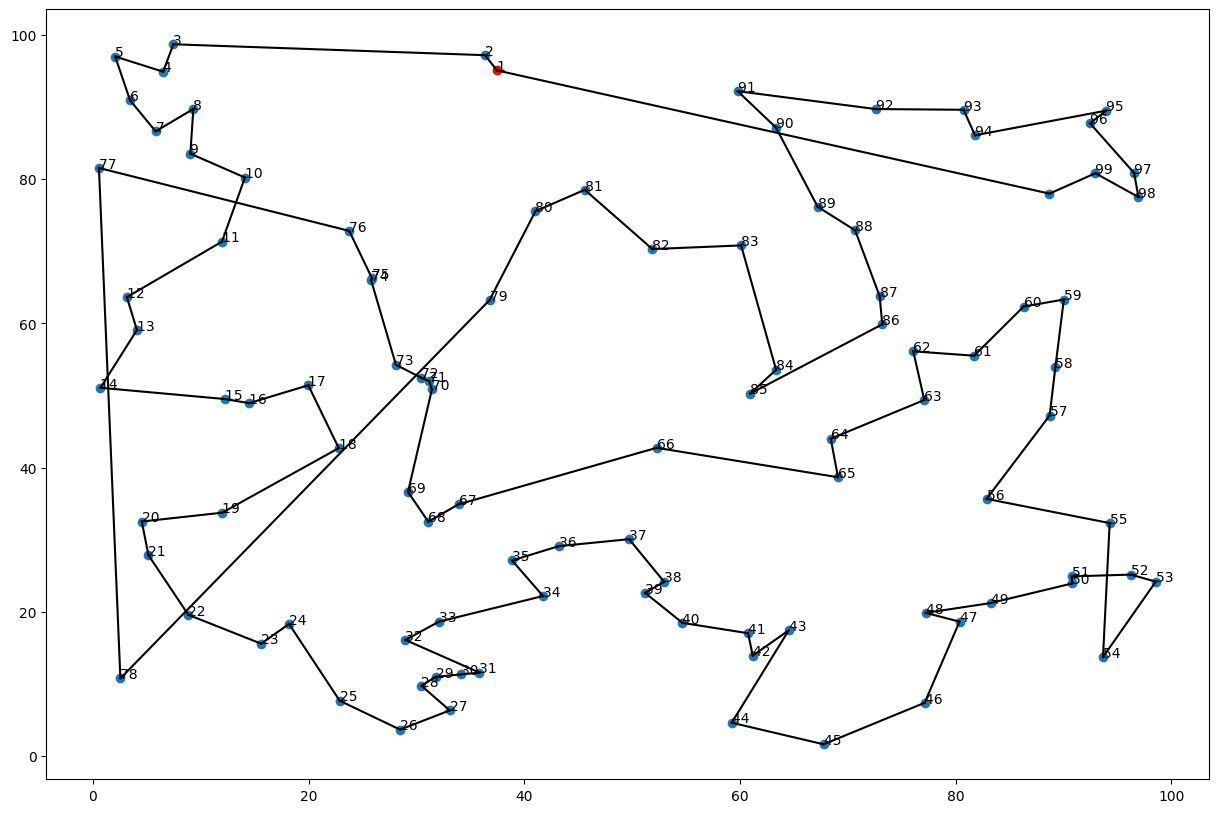

Total tour cost:  933.844255101212


In [10]:
nodes = createNodes(100)
path = quot_tsp(nodes)
draw_tsp_sol(path)
print("Total tour cost: ", tour_cost(path))

(array([56., 33.,  6.,  1.,  1.,  0.,  0.,  1.,  1.,  1.]),
 array([ 0.26731051,  7.31907646, 14.37084241, 21.42260836, 28.47437431,
        35.52614026, 42.57790621, 49.62967216, 56.68143811, 63.73320406,
        70.78497001]),
 <BarContainer object of 10 artists>)

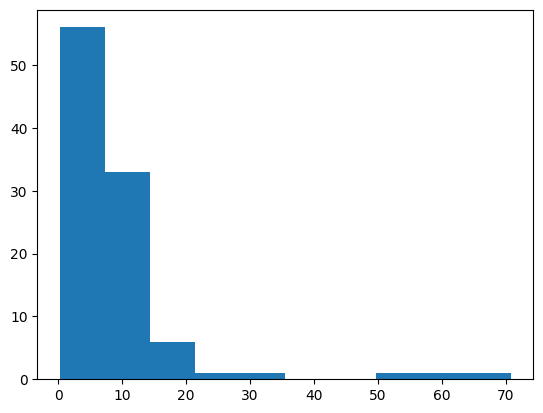

In [11]:
path_dists = [np.linalg.norm(path[i] - path[i-1]) for i in range(1, len(path))]
path_dists.append(np.linalg.norm(path[-1] - path[0]))
# print(np.histogram(a=path_dists, bins=10))
plt.hist(path_dists, bins=10)

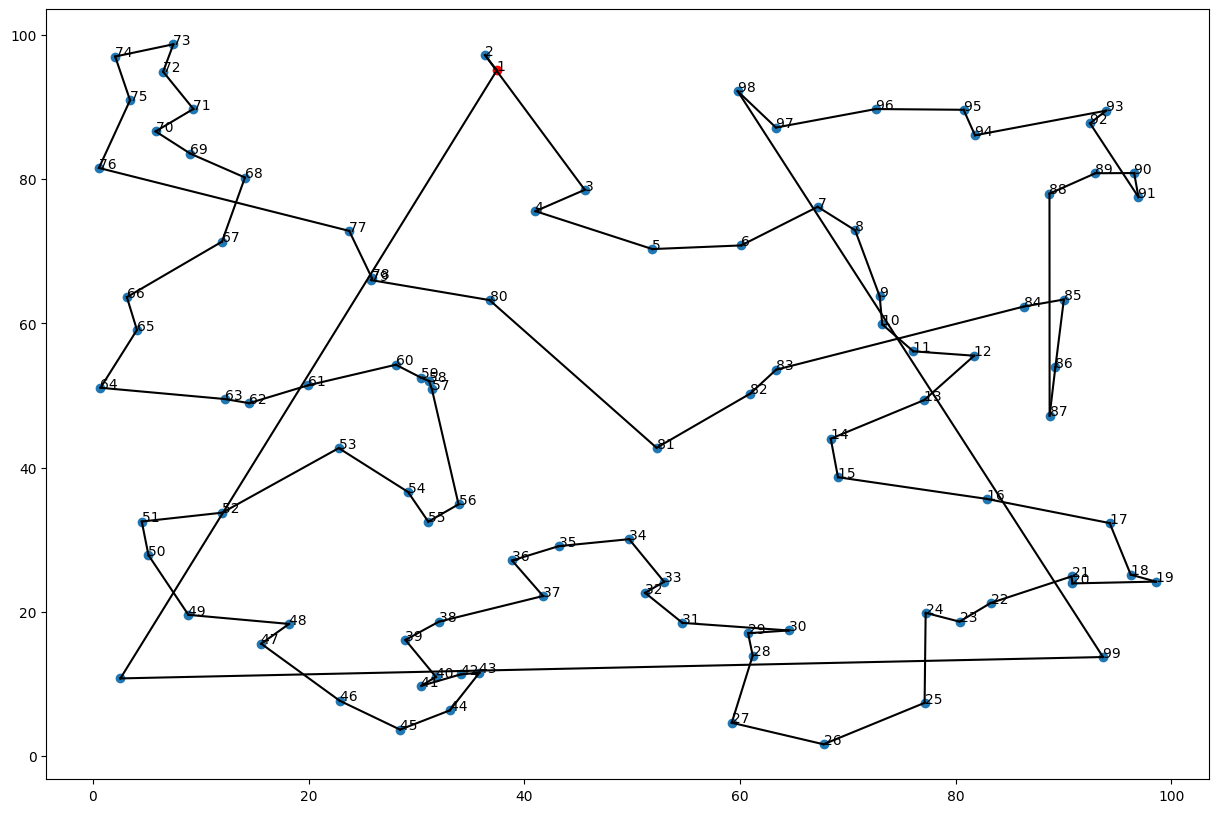

Total tour cost:  1007.9434584512971


In [12]:
path = nn_tsp(nodes)
draw_tsp_sol(path)
print("Total tour cost: ", tour_cost(path))

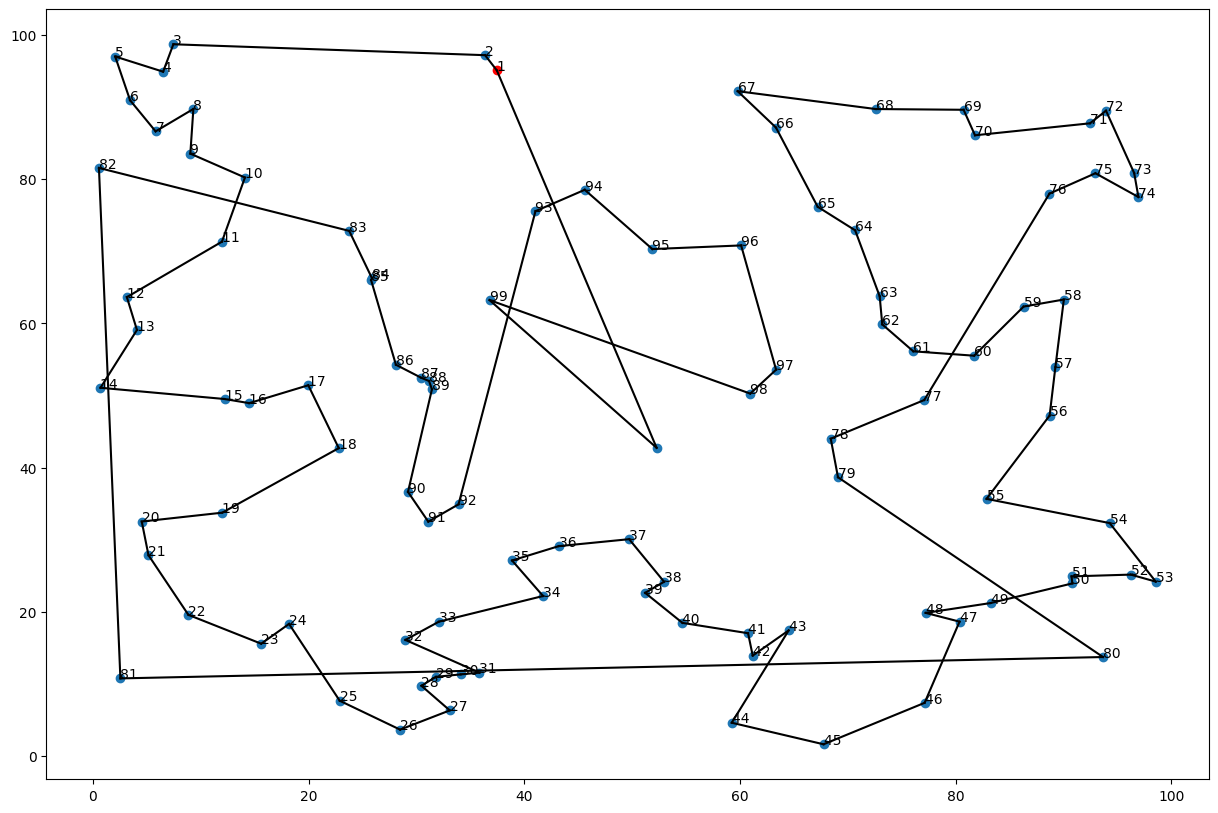

Total tour cost:  1033.8507544119918


In [13]:
path = qcent_tsp(nodes)
draw_tsp_sol(path)
print("Total tour cost: ", tour_cost(path))

In [14]:
def compute_avg_cost(node_count=100, iters=100):
    quot_avg = 0
    nn_avg = 0
    qcent_avg = 0
    
    for _ in range(iters):
        nodes = createNodes(node_count, 2000)
        quot_avg += tour_cost(quot_tsp(nodes)) / iters
        nn_avg += tour_cost(nn_tsp(nodes)) / iters
        qcent_avg += tour_cost(qcent_tsp(nodes)) / iters

    print("Avg quot cost: ", quot_avg)
    print("Avg nn cost: ", nn_avg)
    print("Avg qcent cost: ", qcent_avg)

compute_avg_cost(100, 30)

Avg quot cost:  18206.607580873315
Avg nn cost:  19440.628570638255
Avg qcent cost:  18759.999232275444


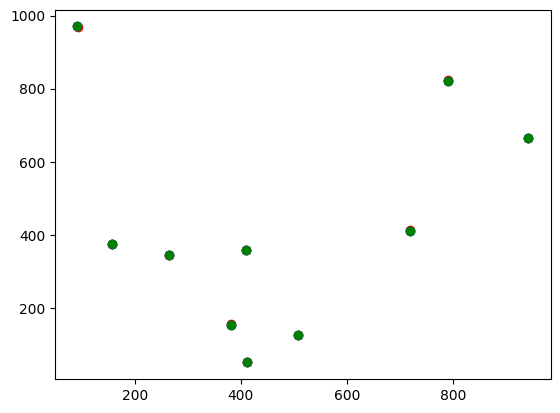

In [15]:
L_0 = 1024
N = 10
c = 8


# PTAS TSP
nodes = createNodes(N, L_0).astype(np.int16)

# grid = [np.empty(()) for i in range()]

# def grid_snap(node, grid_size):
#     ret = np.empty(2)
#     for node in nodes:
#         if node[0] % grid_size < node[1] % grid_size:
#             ret[0] = node[0] / grid_size
#         else:
#             ret[1] = node[1] / grid_size
#     return ret

def grid_snap(node, grid_size):
    return np.round(node / grid_size) * grid_size

grid_size = L_0/(N*c*8)
s1_node = [grid_snap(node, L_0/(N*c*8)) for node in nodes]
s2_node = [grid_snap(node, L_0/(N*c*64)) for node in nodes]
# s3_node = [grid_snap(node, L_0/(*N*c*8)) for node in nodes]

a = np.random.randint(0, L_0)
b = np.random.randint(0, L_0)

for s1, s2, node in zip(s1_node, s2_node, nodes):
    plt.scatter(s1[0], s1[1], c='red')
    plt.scatter(s2[0], s2[1], c='blue')
    plt.scatter(node[0], node[1], c='green')

In [16]:
# Reference-based quadtree
class QuadTree:
    def __init__(self, length, m, parent=None) -> None:
        self.parent = parent
        self.children = None
        self.origin = np.array((0, 0)) # góc dưới bên trái của ô
        self.length = length # Độ dài cạnh ô
        self.value = None
        self.divided = False
        self.portals = []
        self.m = m


    def divide(self) -> list:
        self.divided = True
        c_leng = self.length/2
        self.children = (QuadTree(c_leng, self.m, parent=self) for _ in range(4))
        self.children[0].origin = self.origin
        self.children[1].origin = self.origin + np.array((c_leng, 0))
        self.children[2].origin = self.origin + np.array((0, c_leng))
        self.children[3].origin = self.origin + np.array((c_leng, c_leng))
        return self.children
    

    def child(self, index : int):
        if not self.divided:
            return self.divide()[index]
        return self.children[index]
        

# class Portal:
#     def __init__(self) -> None:
#         self.position = None
#         self.


# class BidirectionalMap:
#     def __init__(self) -> None:
#         self.val = {}
#         self.key = {}

#     def put(self, key, val):
#         self.val[key] = val
#         self.key[val] = key

In [17]:
temp = (p1_nodes + np.array((239, 6))) % (L_0/(8*n*c))
temp

NameError: name 'p1_nodes' is not defined

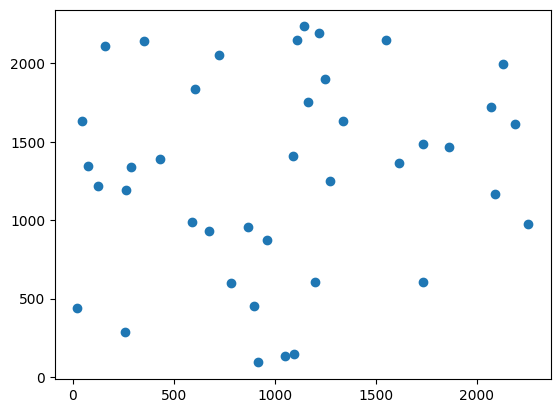

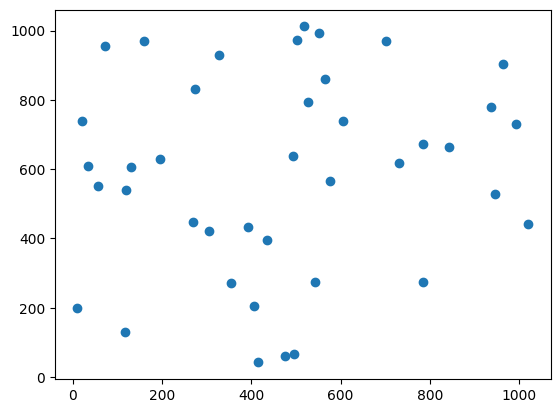

In [ ]:
# def snap(nodes: np.ndarray, scale):
#     return np.round(nodes * scale)

# s = N**2 * np.sqrt(2) / L_0
# temp = snap(nodes, s)

N = 40
L_0 = 1024
epsilon = 3

nodes = createNodes(40, L_0)

def pertubate(nodes, L_0):
    return np.round(nodes * (N**2 * np.sqrt(2) / L_0))

temp = pertubate(nodes, L_0)

plt.scatter(temp[:, 0], temp[:, 1])
plt.show()

plt.scatter(nodes[:, 0], nodes[:, 1])
plt.show()

Node count post pertub:  160


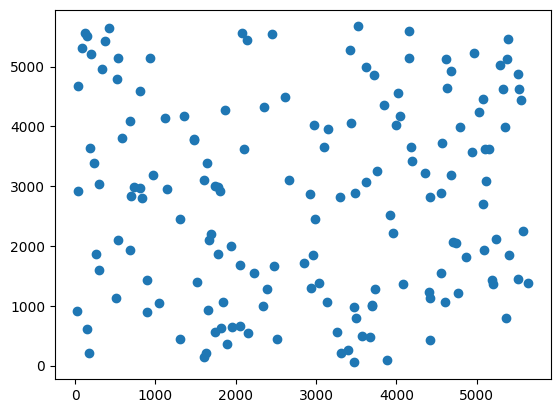

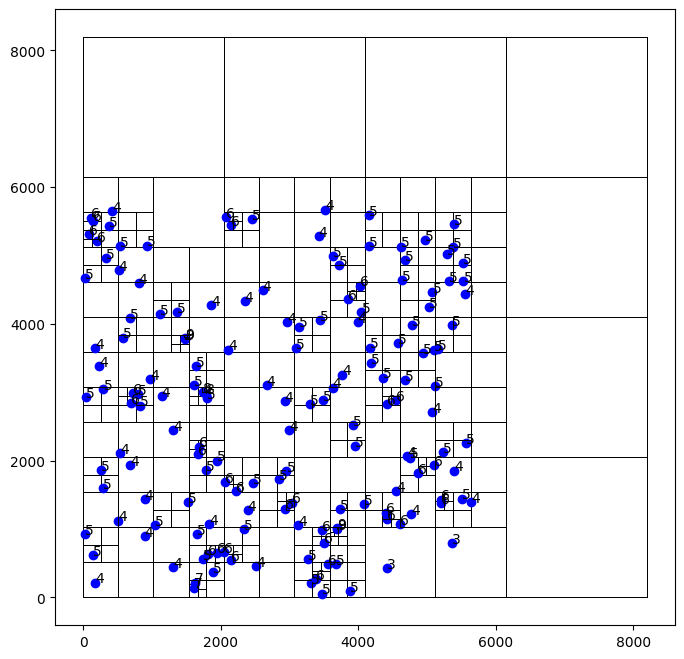

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, prange

np.random.seed(42)  # Đảm bảo kết quả nhất quán

def createNodes(N, scale=100):
    """Tạo nút ngẫu nhiên"""
    # Tạo một danh sách các thành phố (nút) với tọa độ ngẫu nhiên
    return np.random.rand(N, 2) * scale

class AroraQuadTree:
    """Quadtree được sử dụng trong Arora PTAS
    
    nodes: Các điểm cần đi qua trong bài toán TSP
    root: Gốc của cây, dạng TreeNode
    bounds: độ to của bounding box. bounds > max(nodes)

    """
    def __init__(self) -> None:
        """Khởi tạo các giá trị mặc định cho cây
        """
        self.nodes: np.ndarray = []
        self.root : TreeNode = TreeNode()
        self.levels = 0
        self.bound = 0


    def build_tree(self):
        """Dựng quadtree, dựa trên nodes
        Cần phải nhập nodes và bounds trước khi gọi hàm này
        """
        assert self.bound != 0, "Cần nhập bound của cây trước!"
        assert self.bound > np.max(nodes), "Bounds không đủ to để chứa mọi node!"
        assert len(self.nodes), "Cần nhập danh sách node cho cây!"
        self.root.vertex = self.nodes
        self.root.bbox.bound = np.array((self.bound, self.bound))
        TreeNode.divide(self.root)


    def draw(self, figsize=(10, 10)):
        """Vẽ quadtree
        figsize: Độ lớn của hình
        """
        fig, ax = plt.subplots(figsize=figsize)
        self.root.draw(ax)
        plt.show()


class TreeNode:
    """Nút của quadtree

    level: Độ sâu trên cây
    parent: Nút cha
    children: Các nút con
    is_leaf: True nếu là nút lá và vertex != None

    bbox: HCN bao quanh
    vertex: Các điểm nằm trong bbox
    portals:
    """
    def __init__(self, box=(0,0,0,0)) -> None:
        self.level = 0
        self.parent = None
        self.bbox = BBox(box)
        self.is_leaf = False
        self.portals = []
        self.children = None
        self.vertex = None


    def divide(node):
        """Tạo 4 nút con
        node: nút đang xét
        """
        node.children = [[TreeNode(), TreeNode()], [TreeNode(), TreeNode()]]
        for row in node.children:
            for child in row:
                child.parent = node
                child.bbox.bound = node.bbox.bound // 2
                child.level = node.level + 1
        
        b, _ = node.bbox.bound // 2
        node.children[0][0].bbox.pos = node.bbox.pos
        node.children[0][1].bbox.pos = node.bbox.pos + np.array((0, b))
        node.children[1][0].bbox.pos = node.bbox.pos + np.array((b, 0))
        node.children[1][1].bbox.pos = node.bbox.pos + np.array((b, b))

        for row in node.children:
            for child in row:
                child.vertex = node.vertex[[child.bbox.is_inside(m) for m in node.vertex]]
                if len(child.vertex) == 0:
                    continue
                if len(child.vertex) == 1:
                    child.is_leaf = True
                    continue
                TreeNode.divide(child)

    
    # def define_portals(node, m):


    def draw(self, ax):
        """Vẽ bbox và vertex. Làm tương tự với các nút con
        ax: Matplotlib axes
        """
        self.bbox.draw(ax)

        if self.is_leaf:
            for i in range(len(self.vertex)):
                plt.scatter(self.vertex[i, 0], self.vertex[i, 1], color='b')
                ax.annotate(self.level, (self.vertex[i, 0], self.vertex[i, 1]))
            return

        if self.children == None:
            return
        for row in self.children:
            for child in row:
                child.draw(ax)


class BBox:
    """Hình chữ nhật trong không gian 2D"""
    def __init__(self, box=(0,0,0,0)) -> None:
        """Khởi tạo hình chữ nhật
        box: vị trí và kích cỡ hcn
        """
        self.pos = np.array((box[0], box[1]))
        self.bound = np.array((box[2], box[3]))

    def is_inside(self, p) -> bool:
        """Kiểm tra điểm p có nằm trong hcn không
        Nếu p ở trên cạnh trên hoặc cạnh trái => False
        Nếu ở cạnh dưới hoặc cạnh phải => True

        p: Tọa độ điểm cần kiểm tra
        """
        return np.all(self.pos < p) and np.all(p <= self.pos + self.bound)
    
    def draw(self, ax):
        """Vẽ HCN
        ax: Matplotlib axes
        """
        width, height = self.bound
        rect = plt.Rectangle(self.pos, width, height, edgecolor='k', facecolor='none', linewidth=0.7, linestyle="-")
        ax.add_patch(rect)



def next_2power(num):
    '''Tìm số n = k**2 > num, gần num nhất'''
    ret = 1
    while ret < num:
        ret *= 2
    return ret

def pertub(nodes, epsilon, d):
    '''Làm tròn tọa độ các nút để độ phức tạp của quadtree là nlog(n), rồi khử các nút trùng vị trí

    nodes: danh sách các nút
    L_0: độ dài cạnh hình vuông bao quanh mọi nút
    epsilon: tham số. epsilon > 1/(len(nodes) ** (1/3))
    d: độ dài max giữa 2 nút

    Trả về: danh sách nút, sắp xếp tăng dần theo node[0, :]
    '''
    scaled_nodes = np.round(nodes / (epsilon * d/(len(nodes)**1.5)))
    return np.unique(scaled_nodes, axis=0) * 2 + 1


# def pertub(nodes, L_0, c):
#     '''Làm tròn tọa độ các nút để độ phức tạp của quadtree là nlog(n), rồi khử các nút trùng vị trí

#     nodes: danh sách các nút
#     L_0: độ dài cạnh hình vuông bao quanh mọi nút
#     epsilon: tham số. epsilon > 1/(len(nodes) ** (1/3))
#     d: độ dài max giữa 2 nút

#     Trả về: danh sách nút, sắp xếp tăng dần theo node[0, :]
#     '''
#     scaled_nodes = np.round(nodes / (L_0/(8*len(nodes)*c))) * 8
#     return np.unique(scaled_nodes, axis=0) + 1


epsilon = 0.5
L_0 = 256
d = L_0
N = 160

nodes = createNodes(N=N, scale=L_0)
pnodes = pertub(nodes, epsilon, L_0 * np.sqrt(2))
plt.scatter(pnodes[:, 0], pnodes[:, 1])
L = np.max(pnodes)

print("Node count post pertub: ", len(pnodes))

qtree = AroraQuadTree()
qtree.nodes = pnodes
qtree.bound = next_2power(np.max(pnodes))
qtree.build_tree()
qtree.draw(figsize=(8, 8))

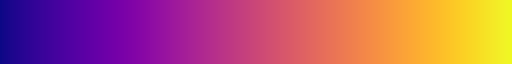

In [ ]:
cm.plasma

In [ ]:
p1 = np.array((0, 0))
p2 = np.array((0, 1.2))
p3 = np.array((2, 2))


np.all(p1 <= p2) and np.all(p2 <= p3)

True

In [ ]:
epsilon = 8
L_0 = 1024
d = L_0
N = 40

nodes = createNodes(N=N, scale=L_0)

def next_2power(num):
    '''Tìm số n = k**2 > num, gần num nhất'''
    ret = 1
    while ret < num:
        ret *= 2
    return ret


def pertub(nodes, epsilon, d, N=len(nodes)):
    '''Làm tròn tọa độ các nút để độ phức tạp của quadtree là nlog(n), rồi khử các nút trùng vị trí

    nodes: danh sách các nút
    L_0: độ dài cạnh hình vuông bao quanh mọi nút
    epsilon: tham số. epsilon > 1/(len(nodes) ** (1/3))
    d: độ dài max giữa 2 nút

    Trả về: danh sách nút, sắp xếp tăng dần theo node[0, :]
    '''
    scaled_nodes = np.round(nodes / (epsilon * d/(N**1.5)))
    return np.unique(scaled_nodes, axis=0) * 2 + 1





nodes = pertub(nodes, epsilon, d)
L = np.max(nodes)

In [ ]:
epsilon = 8
L_0 = 1024
d = L_0
N = 40

nodes = createNodes(N=N, scale=L_0)

pnodes = np.round(nodes / (epsilon * d/(N**1.5)))
pnodes1 = np.unique(pnodes, axis=0)
pnodes1

In [ ]:
treenode = TreeNode()
m + 2 = 2

portallist = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

TOP = 0
RIGHT = 1
DOWN = 2
LEFT = 3

idx = 5

NameError: name 'TreeNode' is not defined

In [30]:
class Portal:
    IN = -1
    OUT = 1
    UNUSED = 0

    def __init__(self) -> None:
        self.position = np.zeros(2)
        self.state = Portal.UNUSED


class PortalSet:
    TOP = 0
    RIGHT = 1
    DOWN = 2
    LEFT = 3

    def __init__(self, m=1) -> None:
        self.m = m
        self.portalset = [Portal() for i in range(4*self.m + 4)]
        self.top = self.portalset[: m+2]
        self.down = self.portalset[m+1 : 2*(m+1)-1]
        self.left = self.portalset[2*(m+1) : 3*(m+1)+1]
        self.right = self.portalset[3*(m+1) : 4*(m+1)+1]

    def is_valid(arr1, arr2):
        val = arr1 + reversed(arr2)
        return sum(val) == 0

    def is_valid_vertical(above=None, below=None) -> bool:
        up_port = np.array([port.state for port in above.down])
        down_port = np.array([port.state for port in below.up])
        return PortalSet.is_valid(up_port, down_port)

    def is_valid_horizontal(leftside=None, rightside=None) -> bool:
        left_port = np.array([port.state for port in leftside.right])
        right_port = np.array([port.state for port in rightside.left])
        return PortalSet.is_valid(left_port, right_port)

    def is_subproblem_valid(subprob=None) -> bool:
        pass


portalset = PortalSet(m=2)
print(len(portalset.portalset))
print(len(portalset.top))
print(len(portalset.down))
print(len(portalset.left))
print(len(portalset.right))

m = 2
# print((0, m+1))
# print((m+1-1, 2*(m+1)))
# print((2*(m+1)-1, 3*(m+1)))
# print((3*(m+1)-1, 4*(m+1)))

a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

a1 = a[: m+2]
b = a[m+1 : 2*(m+1)+1]
c = a[2*(m+1) : 3*(m+1)+1]
print(a1)
print(b)
print(c)




12
4
2
4
3
[0, 1, 2, 3]
[3, 4, 5, 6]
[6, 7, 8, 9]


In [ ]:
def generatePortalSet(num, n=2):

In [41]:
def gen_parenthesis(left,right, temp, result):
    if left == 0 and right == 0:
        result.append(temp)
        return
    if left>0:
        gen_parenthesis(left-1,right,temp+'(',result)
    if right > left:
        gen_parenthesis(left, right-1, temp + ')', result)

result = []
gen_parenthesis(6, 6, "", result=result)
print(result)
print(len(result))

['(((((())))))', '((((()()))))', '((((())())))', '((((()))()))', '((((())))())', '((((()))))()', '(((()(()))))', '(((()()())))', '(((()())()))', '(((()()))())', '(((()())))()', '(((())(())))', '(((())()()))', '(((())())())', '(((())()))()', '(((()))(()))', '(((()))()())', '(((()))())()', '(((())))(())', '(((())))()()', '((()((()))))', '((()(()())))', '((()(())()))', '((()(()))())', '((()(())))()', '((()()(())))', '((()()()()))', '((()()())())', '((()()()))()', '((()())(()))', '((()())()())', '((()())())()', '((()()))(())', '((()()))()()', '((())((())))', '((())(()()))', '((())(())())', '((())(()))()', '((())()(()))', '((())()()())', '((())()())()', '((())())(())', '((())())()()', '((()))((()))', '((()))(()())', '((()))(())()', '((()))()(())', '((()))()()()', '(()(((()))))', '(()((()())))', '(()((())()))', '(()((()))())', '(()((())))()', '(()(()(())))', '(()(()()()))', '(()(()())())', '(()(()()))()', '(()(())(()))', '(()(())()())', '(()(())())()', '(()(()))(())', '(()(()))()()', '(()()(